In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('cfd_results_1000.csv')
df

,SampleID,InletArea_m2,OutletArea_m2,DuctLength_m,CurvatureRadius_m,FlowRate_kgps,PressureDrop_Pa
0,1,0.03124,0.02555,1.114,0.673,0.2144,536.88
1,2,0.04852,0.03626,1.096,0.797,0.2611,632.65
2,3,0.04196,0.04619,1.888,0.250,0.2520,438.76
3,4,0.03796,0.04197,1.099,0.625,0.1308,461.20
4,5,0.02468,0.04420,1.126,0.572,0.1298,435.37
...,...,...,...,...,...,...,...
995,996,0.02275,0.03971,1.838,0.442,0.2795,567.48
996,997,0.04752,0.04870,0.989,0.334,0.1239,301.52
997,998,0.02410,0.02207,1.172,0.395,0.1656,362.55
998,999,0.04851,0.02171,1.148,0.530,0.2631,521.90


In [4]:
# Define features (X) and target (y)
X = df[['InletArea_m2', 'OutletArea_m2', 'DuctLength_m', 'CurvatureRadius_m', 'FlowRate_kgps']]
y = df['PressureDrop_Pa']

In [5]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train

,InletArea_m2,OutletArea_m2,DuctLength_m,CurvatureRadius_m,FlowRate_kgps
29,0.02139,0.04487,1.585,0.632,0.1721
535,0.04834,0.02366,1.801,0.130,0.2176
695,0.03832,0.02205,1.423,0.030,0.2760
557,0.02086,0.03233,1.159,0.488,0.2358
836,0.04745,0.02384,1.992,0.933,0.1755
...,...,...,...,...,...
106,0.03231,0.03189,1.829,0.723,0.2931
270,0.04428,0.04085,0.925,0.253,0.2298
860,0.04327,0.04329,1.840,0.815,0.2251
435,0.04103,0.02090,1.267,0.389,0.1561


In [7]:
X_test

,InletArea_m2,OutletArea_m2,DuctLength_m,CurvatureRadius_m,FlowRate_kgps
521,0.03143,0.04803,0.961,0.469,0.2154
737,0.04450,0.02584,1.453,0.751,0.1698
740,0.03388,0.04483,1.239,0.904,0.2437
660,0.03068,0.03802,1.367,0.510,0.2022
411,0.04850,0.02336,0.969,0.130,0.1008
...,...,...,...,...,...
408,0.04716,0.03756,1.986,0.241,0.1764
332,0.02043,0.02685,1.525,0.170,0.1880
208,0.02015,0.02821,1.151,0.439,0.1172
613,0.02245,0.02973,1.689,0.798,0.1218


In [8]:
y_train

29     528.78
535    344.19
695    303.82
557    465.26
836    722.38
        ...  
106    715.69
270    328.62
860    685.86
435    380.55
102    649.32
Name: PressureDrop_Pa, Length: 800, dtype: float64

In [9]:
y_test

521    429.48
737    580.07
740    702.15
660    481.70
411    174.49
        ...  
408    371.24
332    298.12
208    361.83
613    596.12
78     415.29
Name: PressureDrop_Pa, Length: 200, dtype: float64

In [10]:
# Train a regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([440.5273, 568.1754, 696.3319, 511.3809, 197.246 , 630.4363,
       182.2847, 646.9814, 653.9167, 592.5891, 515.1119, 659.8058,
       701.3112, 630.501 , 390.648 , 658.3304, 378.2703, 262.9159,
       637.4692, 624.8425, 532.2354, 286.7373, 512.0758, 707.5998,
       290.2131, 313.7449, 602.4631, 289.6765, 594.4582, 568.0424,
       430.9679, 322.1411, 419.3134, 585.3872, 306.5909, 243.9726,
       365.8049, 472.6417, 440.5798, 793.5119, 261.464 , 672.4675,
       527.0789, 321.1319, 624.4226, 444.8234, 646.0598, 527.1816,
       610.8895, 229.4627, 360.3177, 360.3524, 558.7924, 670.6303,
       410.4947, 332.4473, 661.5638, 402.6388, 320.9009, 403.8586,
       461.7399, 620.5788, 287.782 , 525.5777, 348.2705, 541.6665,
       199.9449, 422.3155, 569.1439, 378.9627, 235.3356, 712.6388,
       725.8084, 543.4214, 387.1887, 347.9445, 634.4534, 489.4184,
       385.4837, 286.5676, 441.5984, 179.3602, 655.907 , 736.8382,
       614.3397, 391.9607, 536.5644, 665.5827, 561.8771, 533.6

In [12]:
# Evaluate the model
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 12.573267000000019
MSE: 271.4545043811001
R² Score: 0.9878803722723589


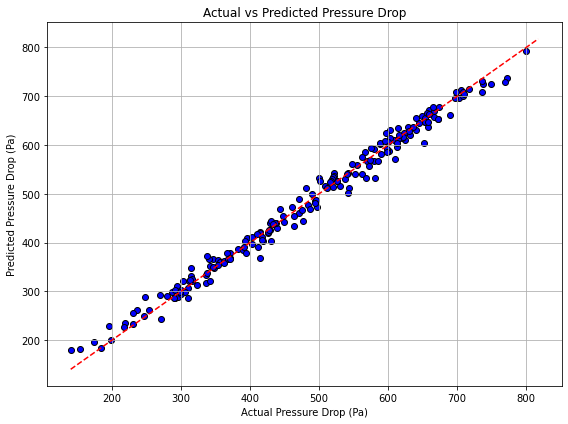

In [13]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Pressure Drop (Pa)')
plt.ylabel('Predicted Pressure Drop (Pa)')
plt.title('Actual vs Predicted Pressure Drop')
plt.grid(True)
plt.tight_layout()
plt.show()